In [66]:
import numpy as np
import matplotlib.pyplot as plt

def conjugate_gradient(Q, b, x0, tol=1e-6):
    x = x0
    r = b - Q.dot(x)
    d = r
    k = 0
    while np.linalg.norm(r) > tol:
        alpha = np.dot(r, r) / np.dot(d, Q.dot(d))
        x = x + alpha * d
        r_new = r - alpha * Q.dot(d)
        beta = np.dot(r_new, r_new) / np.dot(r, r)
        d = r_new + beta * d
        r = r_new
        k += 1
    return x, k


# Define a simple quadratic function and its gradient
Q = np.array([[2, 1], [1, 2]])
b = np.array([1, 2])
def f(x):
    return 0.5 * x.dot(Q).dot(x) - b.dot(x)
def grad(x):
    return Q.dot(x) - b

# Test the conjugate_gradient function
x0 = np.zeros(2)
x_cg, k = conjugate_gradient(Q, b, x0, tol=1e-6)
print("CG iterations:", k)
print("X_cg:", x_cg)

CG iterations: 2
X_cg: [-5.55111512e-17  1.00000000e+00]


CG iterations: 2
CG error: [2.23606798 4.24264069]
GD iterations: 1000
GD error: 0.2804535772707443


/var/folders/16/t4llrcmx5cv08grm3fmvx85r0000gn/T/ipykernel_37107/3958756482.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return Q.dot(x) - b


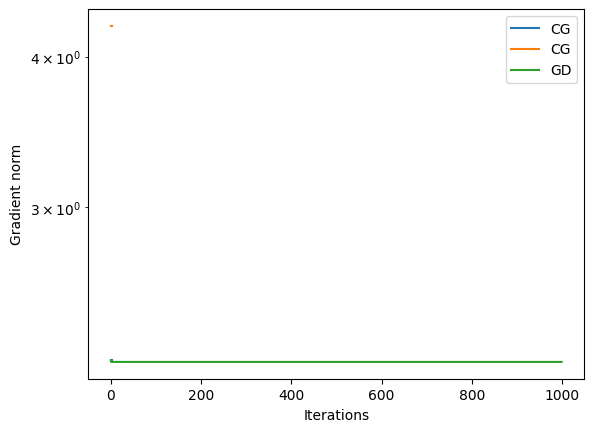

In [76]:
Q = np.array([[2, 1], [1, 2]])
b = np.array([1, 2])
x0 = np.zeros(2)

tol = 1e-6
max_iter = 1000
step_size = 1e-3

def f(x):
    return 0.5 * x.dot(Q).dot(x) - b.dot(x)

def grad(x):
    return Q.dot(x) - b

# Conjugate gradient
x_cg = conjugate_gradient(Q, b, x0, tol=tol)
k_cg = np.sum([np.linalg.norm(grad(x_cg)) > tol])
print("CG iterations:", k_cg)
print("CG error:", np.linalg.norm(grad(x_cg)))

# Gradient descent
x_gd = x0
for k in range(max_iter):
    x_gd = x_gd - step_size * grad(x_gd)
    if np.linalg.norm(grad(x_gd)) < tol:
        break
k_gd = k + 1
print("GD iterations:", k_gd)
print("GD error:", np.linalg.norm(grad(x_gd)))

# Plot the convergence rate
plt.plot(range(k_cg+1), [np.linalg.norm(grad(conjugate_gradient(Q, b, x0, tol=tol))) for k in range(k_cg+1)], label="CG")
plt.plot(range(k_gd), [np.linalg.norm(grad(x)) for x in [x0]+[x0 - step_size * grad(x0) for k in range(k_gd-1)]], label="GD")
plt.xlabel("Iterations")
plt.ylabel("Gradient norm")
plt.yscale("log")
plt.legend()
plt.show()


In [69]:
def f(x):
    return 2*x[0]**2 + 3*x[1]**2 - 4*x[0]*x[1] - 4*x[0] - 6*x[1] + 10

def grad_f(x):
    return np.array([4*x[0] - 4*x[1] - 4, 6*x[1] - 4*x[0] - 6])

Q = np.array([[4, -4], [-4, 6]])
b = np.array([-4, -6])
x0 = np.array([0, 0])
tol = 1e-6
def conjugate_gradient(Q, b, x0, tol=1e-6):
    x = x0
    r = b - Q.dot(x)
    d = r
    k = 0
    while np.linalg.norm(r) > tol:
        alpha = np.dot(r, r) / np.dot(d, Q.dot(d))
        x = x + alpha * d
        r_new = r - alpha * Q.dot(d)
        beta = np.dot(r_new, r_new) / np.dot(r, r)
        d = r_new + beta * d
        r = r_new
        k += 1
    return x, k

x_cg, k_cg = conjugate_gradient(Q, b, x0, tol=tol)
print("Conjugate Gradient:")
print("x* =", x_cg)
print("f(x*) =", f(x_cg))
print("Gradient norm at x* =", np.linalg.norm(grad_f(x_cg)))
print("Number of iterations =", k_cg)


Conjugate Gradient:
x* = [-6. -5.]
f(x*) = 90.99999999999997
Gradient norm at x* = 14.422205101855955
Number of iterations = 2


In [70]:
step_size = 0.1
max_iter = 1000

x_gd = x0
for k in range(max_iter):
    x_gd = x_gd - step_size * grad_f(x_gd)
    if np.linalg.norm(grad_f(x_gd)) < tol:
        break
k_gd = k + 1

print("\nGradient Descent:")
print("x* =", x_gd)
print("f(x*) =", f(x_gd))
print("Gradient norm at x* =", np.linalg.norm(grad_f(x_gd)))
print("Number of iterations =", k_gd)


Gradient Descent:
x* = [5.99999914 4.99999933]
f(x*) = -16.99999999999948
Gradient norm at x* = 9.54854277010205e-07
Number of iterations = 172


/var/folders/16/t4llrcmx5cv08grm3fmvx85r0000gn/T/ipykernel_37107/3045211789.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return Q.dot(x) - b


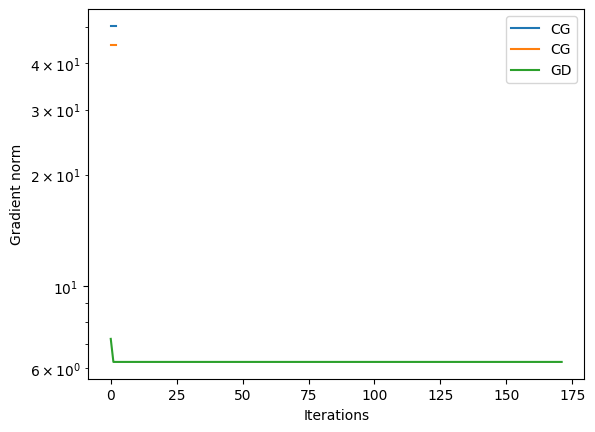

In [71]:
plt.plot(range(k_cg+1), [np.linalg.norm(grad(conjugate_gradient(Q, b, x0, tol=tol))) for k in range(k_cg+1)], label="CG")
plt.plot(range(k_gd), [np.linalg.norm(grad(x)) for x in [x0]+[x0 - step_size * grad(x0) for k in range(k_gd-1)]], label="GD")
plt.xlabel("Iterations")
plt.ylabel("Gradient norm")
plt.yscale("log")
plt.legend()
plt.show()

In [72]:
# Define the quadratic function and its gradient
Q = np.array([[2, 1], [1, 2]])
b = np.array([1, 2])
x0 = np.zeros(2)

def f(x):
    return 0.5 * x.dot(Q).dot(x) - b.dot(x)

def grad(x):
    return Q.dot(x) - b

def conjugate_gradient2(Q, b, x0, tol=1e-6):
    x = x0
    r = b - Q.dot(x)
    d = r
    k = 0
    while np.linalg.norm(r) > tol:
        Qd = Q.dot(d)
        alpha = r.dot(r) / d.dot(Qd)
        x += alpha * d
        r_new = r - alpha * Qd
        beta = r_new.dot(r_new) / r.dot(r)
        d = r_new + beta * d
        r = r_new
        k += 1
    return x, k

# Test the conjugate gradient method
tol = 1e-6
x_cg, k_cg = conjugate_gradient2(Q, grad(x0), x0, tol=tol)
print("Conjugate Gradient:")
print("x* =", x_cg)
print("f(x*) =", f(x_cg))
print("Gradient norm at x* =", np.linalg.norm(grad(x_cg)))
print("Number of iterations:", k_cg)

Conjugate Gradient:
x* = [ 5.55111512e-17 -1.00000000e+00]
f(x*) = 3.0
Gradient norm at x* = 4.47213595499958
Number of iterations: 2


In [73]:
step_size = 0.1
max_iter = 1000

x_gd = x0
for k in range(max_iter):
    x_gd = x_gd - step_size * grad_f(x_gd)
    if np.linalg.norm(grad_f(x_gd)) < tol:
        break
k_gd = k + 1

print("\nGradient Descent:")
print("x* =", x_gd)
print("f(x*) =", f(x_gd))
print("Gradient norm at x* =", np.linalg.norm(grad(x_gd)))
print("Number of iterations =", k_gd)


Gradient Descent:
x* = [5.99999916 4.99999934]
f(x*) = 74.99997725020566
Gradient norm at x* = 21.2602884327092
Number of iterations = 173


/var/folders/16/t4llrcmx5cv08grm3fmvx85r0000gn/T/ipykernel_37107/1463443881.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return Q.dot(x) - b


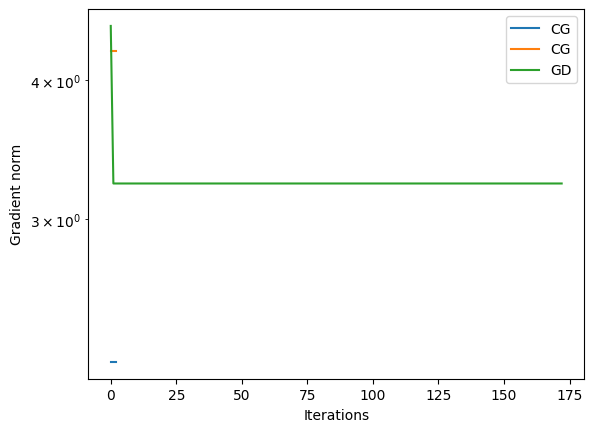

In [74]:
plt.plot(range(k_cg+1), [np.linalg.norm(grad(conjugate_gradient(Q, b, x0, tol=tol))) for k in range(k_cg+1)], label="CG")
plt.plot(range(k_gd), [np.linalg.norm(grad(x)) for x in [x0]+[x0 - step_size * grad(x0) for k in range(k_gd-1)]], label="GD")
plt.xlabel("Iterations")
plt.ylabel("Gradient norm")
plt.yscale("log")
plt.legend()
plt.show()